In [101]:
import networkx as nx
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt

In [61]:
cat_path  = "cat.csv"
data_path = "data.csv"

all_cat = open(cat_path, 'r').read().split(",")
df      = pd.read_csv(data_path)

In [50]:
df.head()

,Author,Fields
0,R. Blute,gr-qc;math;gr-qc;quant-ph;math;math;math;cs;ma...
1,Chengyan Liu,math;math;math;physics;math;cs;math;math;math;...
2,Stefan Johansson,math;math;cs;cs;physics;alg-geom;alg-geom;astr...
3,E. Formenti,nlin;cs;physics;physics;physics;cs;cs;q-fin;q-...
4,Joel Huselius,cs;cs;cs;cs;cs;gr-qc;hep-lat;hep-lat;hep-lat;h...


In [152]:
# Initialize graph
G = nx.Graph()
# Adding the node to graph
G.add_nodes_from(all_cat)

In [153]:
for field in  df["Fields"].values:
    field_list = field.split(";")
    field_pair = itertools.combinations(field_list, 2)
    G.add_edges_from(field_pair)
    
# G.edges
# test = df["Fields"].values[1].split(";")
# test2 = list(itertools.combinations(test,2))

In [146]:
# # Initialize graph
# G = nx.Graph()
# # Adding the node to graph
# G.add_nodes_from(all_cat)
# G.add_edges_from(test2)

In [148]:
# G.add_node()
# G.add_edge()

# G.add_node("test", author = "Tu", test = "test2")

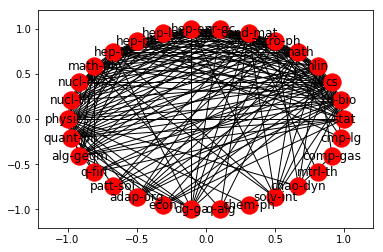

In [154]:
nx.draw_networkx(G,pos = nx.circular_layout(G),with_labels=True)
plt.show()